In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau 
from tensorflow.keras.layers import Conv1D, TimeDistributed, Flatten, SpatialDropout1D, GlobalAveragePooling1D
from tensorflow.keras.layers import MaxPooling1D, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
from numpy import genfromtxt

/Users/niall/opt/anaconda3/envs/DCUML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/niall/opt/anaconda3/envs/DCUML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/niall/opt/anaconda3/envs/DCUML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/niall/opt/anaconda3/envs/DCUML

In [2]:
def get_data():
    input_file = '/Users/niall/Documents/Cypress_Code/Data/Flip_bits/flip_bits_dataset_final.csv'
    my_data_flipped = genfromtxt(input_file, delimiter=',')

    new_data = np.delete(my_data_flipped, (0), axis=0)
    X2 = np.delete(new_data, (0,32), axis=1)
    Y2 = new_data[:,32]
    X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.25, random_state=42)
    X_train = np.array(X_train).reshape((np.shape(X_train)[0], 1, np.shape(X_train)[1]))
    X_test = np.array(X_test).reshape((np.shape(X_test)[0], 1, np.shape(X_test)[1]))

    return X_train, X_test, y_train, y_test

In [3]:
flip_bit_data = get_data()

In [4]:
X_train = flip_bit_data[0]
X_test = flip_bit_data[1]
y_train = flip_bit_data[2]
y_test = flip_bit_data[3]

## Bidirectional LSTM with GlobalMaxPool

In [30]:
num_neurons = 31
num_features = 31

model_bidir = Sequential()
model_bidir.add(Bidirectional(LSTM(num_neurons, return_sequences=True),input_shape=(1, num_features)))
model_bidir.add(GlobalMaxPooling1D())
model_bidir.add(Dense(16, activation='sigmoid'))
model_bidir.add(Dropout(0.2))
model_bidir.add(Dense(1, activation='sigmoid'))


rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_bidir.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bidir.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 1, 62)             15624     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 62)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1008      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 16,649
Trainable params: 16,649
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_bidir.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
print('Training BLSTM...')

batch_size = 5

history_one_blstm = model_bidir.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    validation_data=(X_test, y_test))

Training BLSTM...
Train on 450000 samples, validate on 150000 samples
Epoch 1/5
450000/450000 [==============================] - 337s 749us/sample - loss: 0.0419 - acc: 0.9857 - val_loss: 0.0371 - val_acc: 0.9874
Epoch 2/5
450000/450000 [==============================] - 334s 741us/sample - loss: 0.0366 - acc: 0.9873 - val_loss: 0.0347 - val_acc: 0.9878
Epoch 3/5
450000/450000 [==============================] - 329s 730us/sample - loss: 0.0351 - acc: 0.9877 - val_loss: 0.0354 - val_acc: 0.9876
Epoch 4/5
450000/450000 [==============================] - 331s 735us/sample - loss: 0.0346 - acc: 0.9879 - val_loss: 0.0339 - val_acc: 0.9879
Epoch 5/5
450000/450000 [==============================] - 334s 742us/sample - loss: 0.0340 - acc: 0.9882 - val_loss: 0.0366 - val_acc: 0.9874


150000/150000 [==============================] - 5s 31us/sample - loss: 0.0366 - acc: 0.9874
Test Loss:  0.036621900583805204
Test Accuracy 0.98736
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


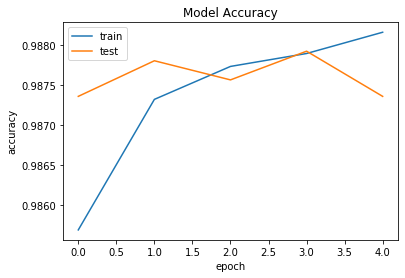

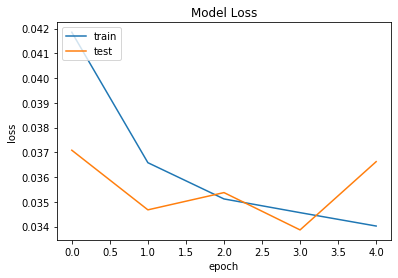

In [34]:
score = model_bidir.evaluate(X_test, y_test)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_one_blstm.history.keys())
# summarize history for accuracy
plt.plot(history_one_blstm.history['acc'])
plt.plot(history_one_blstm.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_one_blstm.history['loss'])
plt.plot(history_one_blstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# Let's save the model to disc
json = model_bidir.to_json()
with open("/Users/niall/Documents/Cypress_Code/Models/BLSTM/Flip_bits/model_one_blstm_flip_bits.json", "w") as file:
    file.write(json)
model_bidir.save_weights("/Users/niall/Documents/Cypress_Code/Models/BLSTM/Flip_bits/model_one_blstm_flip_bits.h5")
print("Saved model to disc")

Saved model to disc


In [41]:
# Load the model of interest
json_file = open('/Users/niall/Documents/Cypress_Code/Models/BLSTM/Flip_bits/model_one_blstm_flip_bits.json', 'r')
json = json_file.read()
json_file.close()
model_avg_from_disc = model_from_json(json)
model_avg_from_disc.load_weights("/Users/niall/Documents/Cypress_Code/Models/BLSTM/Flip_bits/model_one_blstm_flip_bits.h5")

In [42]:
y_preds_blstm_minus = model_avg_from_disc.predict(X_test, batch_size=1)

In [43]:
pred_avg = pd.DataFrame(y_preds_blstm_minus, columns =['Y_pred']) 
pred_avg['Label'] = y_test

In [44]:
pred_avg.to_csv('/Users/niall/Documents/Cypress_Code/Predictions/BLSTM/Flip_bits/model_one_blstm_flip_bits.csv', index = False)

## Bidirectional with different activation functions

Train on 450000 samples, validate on 150000 samples
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/5
450000/450000 [==============================] - 338s 752us/sample - loss: 0.0841 - acc: 0.9837 - val_loss: 0.0860 - val_acc: 0.9873
Epoch 2/5
450000/450000 [==============================] - 338s 752us/sample - loss: 0.0755 - acc: 0.9853 - val_loss: 0.0781 - val_acc: 0.9868
Epoch 3/5
450000/450000 [==============================] - 340s 755us/sample - loss: 0.0767 - acc: 0.9865 - val_loss: 0.0708 - val_acc: 0.9871 0s - loss: 0.0767 
Epoch 4/5
450000/450000 [==============================] - 343s 763us/sample - loss: 0.0771 - acc: 0.9868 - val_loss: 0.0800 - val_acc: 0.9867- ac - ETA: 1s -
Epoch 5/5
450000/450000 [==============================] - 343s 763us/sample - loss: 0.0779 - acc: 0.9869 - val_loss: 0.0808 - val_acc: 0.9873
Train on 450000 samples, validate on 150000 samples
Epoch 1/5
450000/450

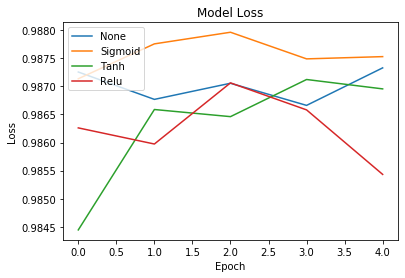

In [15]:
num_neurons = 31
num_features = 31
batch_size = 5

for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model_bidir = Sequential()
    model_bidir.add(Bidirectional(LSTM(num_neurons, return_sequences=True),input_shape=(1, num_features)))
    model_bidir.add(GlobalMaxPooling1D())
    model_bidir.add(Dense(16, activation=activation))
    model_bidir.add(Dropout(0.2))
    model_bidir.add(Dense(1, activation=activation))
    rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
    model_bidir.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model_bidir.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    validation_data=(X_test, y_test))
    
    plt.plot(history.history['val_acc'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['None', 'Sigmoid', 'Tanh', 'Relu'], loc='upper left')



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 450000 samples, validate on 150000 samples
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/5
450000/450000 [==============================] - 334s 743us/sample - loss: 0.0810 - acc: 0.9828 - val_loss: 0.0856 - val_acc: 0.9861
Epoch 2/5
450000/450000 [==============================] - 297s 660us/sample - loss: 0.0778 - acc: 0.9854 - val_loss: 0.0895 - val_acc: 0.9865
Epoch 3/5
450000/450000 [==============================] - 288s 639us/sample - loss: 0.0785 - acc: 0.9863 - val_loss: 0.0836 - val_acc: 0.9869
Epoch 4/5
450000/450000 [==============================] - 287s 638us/sample - loss: 0.0745 - acc: 0.9866 - val_loss: 0.0644 - val_acc: 0.9853
Epoch 5/5
450000/450000 [==============================] - 296s

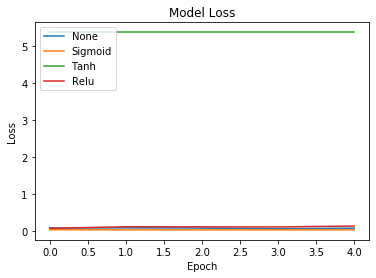

In [5]:
num_neurons = 31
num_features = 31
batch_size = 5

for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model_bidir = Sequential()
    model_bidir.add(Bidirectional(LSTM(num_neurons, return_sequences=True),input_shape=(1, num_features)))
    model_bidir.add(GlobalMaxPooling1D())
    model_bidir.add(Dense(16, activation=activation))
    model_bidir.add(Dropout(0.2))
    model_bidir.add(Dense(1, activation=activation))
    rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
    model_bidir.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model_bidir.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    validation_data=(X_test, y_test))
    
    plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['None', 'Sigmoid', 'Tanh', 'Relu'], loc='upper left')

## BLSTM GlobalAveragePooling

In [8]:
num_neurons = 31
num_features = 31

model_blstm_avg = Sequential()
model_blstm_avg.add(Bidirectional(LSTM(num_neurons, return_sequences=True),input_shape=(1, num_features)))
model_blstm_avg.add(SpatialDropout1D(0.2))
model_blstm_avg.add(Bidirectional(LSTM(num_neurons, return_sequences=True),input_shape=(1, num_features)))
model_blstm_avg.add(GlobalAveragePooling1D())
model_blstm_avg.add(Dense(16, activation='sigmoid'))
model_blstm_avg.add(Dropout(0.2))
model_blstm_avg.add(Dense(1, activation='sigmoid'))

rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_blstm_avg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_blstm_avg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 1, 62)             15624     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 1, 62)             0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 1, 62)             23312     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 62)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                1008      
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total para

In [9]:
print('Training BLSTM...')

batch_size = 5

hist_model_blstm_avg = model_blstm_avg.fit(X_train, y_train, 
                                      batch_size=batch_size,
                                      epochs=5,
                                      validation_data=(X_test, y_test), 
                                      callbacks=[rlrp] ,verbose=1)

Training BLSTM...
Train on 450000 samples, validate on 150000 samples
Epoch 1/5
450000/450000 [==============================] - 576s 1ms/sample - loss: 0.0443 - acc: 0.9852 - val_loss: 0.0366 - val_acc: 0.9870
Epoch 2/5
450000/450000 [==============================] - 579s 1ms/sample - loss: 0.0380 - acc: 0.9870 - val_loss: 0.0373 - val_acc: 0.9873
Epoch 3/5
450000/450000 [==============================] - 693s 2ms/sample - loss: 0.0370 - acc: 0.9874 - val_loss: 0.0354 - val_acc: 0.9874
Epoch 4/5
450000/450000 [==============================] - 645s 1ms/sample - loss: 0.0364 - acc: 0.9877 - val_loss: 0.0345 - val_acc: 0.9879
Epoch 5/5
450000/450000 [==============================] - 574s 1ms/sample - loss: 0.0359 - acc: 0.9878 - val_loss: 0.0346 - val_acc: 0.9876


In [10]:
score = model_blstm_avg.evaluate(X_test, y_test)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(hist_model_blstm_avg.history.keys())
# summarize history for accuracy
plt.plot(hist_model_blstm_avg.history['acc'])
plt.plot(hist_model_blstm_avg.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist_model_blstm_avg.history['loss'])
plt.plot(hist_model_blstm_avg.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

AttributeError: 'History' object has no attribute 'evaluate'